Importo librerias necesarias para el proyecto

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

Importo y veo Dataset

In [2]:
data = pd.read_csv('../data/base.csv',sep = ";",na_values=['-1','-2','-3','-4','-5','-6','-7','-8','-10'],skip_blank_lines=True)
data.head(5)

C:\Users\Pablo\anaconda3\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,235,242,243,253,254,255,256,257) have mixed types.Specify dtype option on import or set lo

,ID1,cod_provincia,sector,ambito,claveseccion,idalumno,ap01_01,ap01_02,ap02,ap03,...,trabaja_fuera_hogar_remunerado,migración,edadA_junio2019,sobreedad,infraestructura,iinfraestructura,ap42_01rec,ap42_02rec,ap42_03rec,ap42_04rec
0,120003000120003,2,2,1,02SF00003,3,10,4,1,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
1,120003000120003,2,2,1,02SF00003,25,7,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
2,120003000120003,2,2,1,02SF00002,27,3,5,1,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2
3,120003000120003,2,2,1,02SF00002,3,11,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,1,1
4,120003000120003,2,2,1,02SF00003,5,11,4,2,1,...,3,2,17,1,",218644881556733",2.0,2,2,2,2


Inspecciono Dataset, veo tamaño y atributos

In [3]:
#print data properties
print('Data Shape: {}'.format(data.shape))
display(data.describe())
display(data.info())

Data Shape: (343750, 264)


,ID1,cod_provincia,sector,ambito,idalumno,isocioa,iinfraestructura
count,3.437500e+05,343750.000000,343750.000000,343750.000000,343750.000000,323812.000000,281418.000000
mean,4.177331e+14,31.479959,1.382345,1.087953,51.739991,2.035382,-0.719663
std,2.413496e+14,30.151272,0.485961,0.283228,195.380806,0.606623,16.539593
min,3.600800e+13,2.000000,1.000000,1.000000,1.000000,1.000000,-99.000000
25%,2.086500e+14,6.000000,1.000000,1.000000,5.000000,2.000000,2.000000
50%,3.621002e+14,14.000000,1.000000,1.000000,10.000000,2.000000,2.000000
75%,5.960001e+14,54.000000,2.000000,1.000000,17.000000,2.000000,2.000000
max,1.000000e+15,94.000000,2.000000,2.000000,999.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343750 entries, 0 to 343749
Columns: 264 entries, ID1 to ap42_04rec
dtypes: float64(2), int64(5), object(257)
memory usage: 692.4+ MB


None

Dropeo Variables que no nos interesan para el proyecto

In [4]:
columns_drop = ['modelo','ponder','lpondera','mpondera','ap33_04bis','ap33_06bis','TEL','TEM','isocioa_puntaje','isocioal_puntaje','isocioam_puntaje','claveseccion','idalumno','ap01_01','ap10','ap11_01','ap11_02','ap11_03','ap11_04','ap11_05','ap11_06','ap11_07','ap12','ap13','ap14_01','ap15','ap18_01','ap18_02','ap18_03','ap19','ap22','ap27_a','ap27_b','ap27_c','ap27_d','ap27_e','ap27_f','ap28_02','ap28_03','ap28_04','ap29_01.dico','ap29_02','ap29_02.dico','ap29_03','ap29_03.dico','ap29_04','ap29_04.dico','ap29_05','ap29_05.dico','ap29_06','ap29_06.dico','ap29_07','ap29_07.dico','ap30','ap31_01','ap31_02','ap31_03','ap31_04','ap31_05','ap31_06','ap32_a','ap32_b','ap32_c','ap32_d','ap32_f','ap33_01bis','ap33_02_a','ap33_02_b','ap33_02bis','ap33_03_a','ap33_03_b','ap33_03bis','ap33_04_a','ap33_04_b','ap33_05bis','ap33_07bis','ap33_08bis','ap33_09bis','ap33_10bis','ap33_11bis','ap35_01','ap35_02','ap35_04','ap35_05','ap36_a','ap36_b','ap36_c','ap36_d','ap36_e','ap36_f','ap37_a','ap37_b','ap37_c','ap37_d','ap37_dicotomica','ap37_e','ap37_f','ap37_g','ap37_h','ap37_i','ap37_j','ap37_k','ap37_l','ap37_m','ap37_n','ap38_a','ap38_b','ap38_c','ap38_d','ap38_e','ap38_f','ap38_g','ap38_h','ap38_i','ap38_j','ap38_k','ap38_l','ap38_m','ap38_n','ap41_01','ap41_02','ap41_03','ap41_04','ap41_05','ap41_06','ap41_07','ap41_08','ap41_09','ap41_10','ap41_11','ap42_01rec','ap42_02','ap42_02rec','ap42_03','ap42_03rec','ap42_04','ap42_04rec','ap43_b','ap43_c','ap43_d','ap43_e','ap43_f','ap43_g','ap43_h','ap44_01','ap44_02','ap44_03','ap44_04','ap44_05','ap45','ap46_01','ap46_02','ap46_03','ap46_04','ap46_05','ap47_01','ap47_02','ap47_03','ap47_04','ap47_05','ap47_06','ap47_07','ap47_08','ap47_09','ap47_10','ap47_11','ap47_12','ap48_a','ap48_b','ap48_c','ap48_d','ap48_e','ap48_f','ap48_g','ap48_h','ap48_i','iinfraestructura','isocioal','isocioam','jardín','repitencia_dicotomica','sobreedad','ap08_a','ap08_b','ap08_c','ap08_d','ap08_e','ap08_f','ap08_g','ap08_h','ap08_i','ap26','ap01_02','ap21','ID1','infraestructura']

datafinal =data.drop(columns_drop, axis=1)

Remplazo valores negativos por positivos para posterior transformacion

In [5]:
datafinal['ap32_e']=datafinal['ap32_e'].replace('-9', '2')
datafinal['ap33_01_a']=datafinal['ap33_01_a'].replace('-9', '2')
datafinal['ap33_01_b']=datafinal['ap33_01_b'].replace('-9', '2')
datafinal['ap43_a']=datafinal['ap43_a'].replace('-9', '2')

Paso valores negativos del dataset a NaN

In [7]:
Listacolumns = [ 'ap02', 'ap03', 'ap04', 'ap05',
       'ap06', 'ap07', 'ap09', 'ap11_08', 'ap14_02', 'ap16', 'ap17', 'ap23_01',
       'ap23_02', 'ap23_03', 'ap23_04', 'ap23_05', 'ap23_06', 'ap24',
       'ap25_01', 'ap25_02', 'ap25_03', 'ap28_01', 'ap29_01', 'ap32_e',
       'ap33_01_a', 'ap33_01_b', 'ap34', 'ap35_03', 'ap39_01', 'ap39_02',
       'ap39_03', 'ap39_04', 'ap40_01', 'ap40_02', 'ap40_03', 'ap40_04',
       'ap40_05', 'ap40_06', 'ap42_01', 'ap43_a', 'ap49_01', 'ap49_02',
       'ap50_01', 'ap50_02', 'ap50_03', 'ap50_04', 'ap50_05', 'ap51_01',
       'ap51_02', 'ap51_03', 'ap51_04', 'ap51_05', 'ap51_06', 'ap51_07',
       'ap51_08', 'ap51_09', 'ap51_10',
       'ldesemp', 'mdesemp', 'ap26_rec',
       'trabaja_fuera_hogar', 'trabaja_fuera_hogar_remunerado', 'migración',
       'edadA_junio2019']

In [8]:
for columna in Listacolumns:
    datafinal[columna]=datafinal[columna].replace('-9', np.nan)

In [9]:
for columna in Listacolumns:
    datafinal[columna] = pd.to_numeric(datafinal[columna], errors='coerce',downcast='integer')

Miro % de missings en los atributos

In [10]:
pd.set_option('display.max_rows', 300)
print(datafinal.isna().sum()/len(datafinal)*100)

cod_provincia                      0.000000
sector                             0.000000
ambito                             0.000000
ap02                               2.800291
ap03                               1.923782
ap04                               2.148073
ap05                               3.604655
ap06                               2.643491
ap07                               4.334255
ap09                               3.285527
ap11_08                            6.018618
ap14_02                           14.804945
ap16                               2.652800
ap17                               3.558982
ap23_01                            4.416873
ap23_02                            6.602473
ap23_03                            7.170327
ap23_04                            5.782691
ap23_05                            7.640436
ap23_06                            6.699927
ap24                               3.273309
ap25_01                            9.452509
ap25_02                         

Eliminio los registros con valores NaN

In [11]:
datafinal = datafinal.dropna()

Miro el tamaño del dataset luego de las modificaciones

In [12]:
datafinal.shape

(123018, 68)

Armo formatos finales de cada columna

In [13]:
for columna in datafinal.columns:
    datafinal[columna] = datafinal[columna].astype(object)
datafinal['mdesemp'] = datafinal['mdesemp'].astype(int)

Miro formato final del dataset

In [14]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123018 entries, 0 to 343741
Data columns (total 68 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   cod_provincia                   123018 non-null  object
 1   sector                          123018 non-null  object
 2   ambito                          123018 non-null  object
 3   ap02                            123018 non-null  object
 4   ap03                            123018 non-null  object
 5   ap04                            123018 non-null  object
 6   ap05                            123018 non-null  object
 7   ap06                            123018 non-null  object
 8   ap07                            123018 non-null  object
 9   ap09                            123018 non-null  object
 10  ap11_08                         123018 non-null  object
 11  ap14_02                         123018 non-null  object
 12  ap16                          

Transformo las columnas en formato UTF-8

In [15]:
import re
datafinal = datafinal.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
datafinal.head(5)

,cod_provincia,sector,ambito,ap02,ap03,ap04,ap05,ap06,ap07,ap09,...,ap51_09,ap51_10,ldesemp,mdesemp,isocioa,ap26_rec,trabaja_fuera_hogar,trabaja_fuera_hogar_remunerado,migracin,edadA_junio2019
0,2,2,1,1,1,1,1,2,3,2,...,1,5,4,4,3,3,2,3,2,17
1,2,2,1,2,1,1,1,2,3,2,...,4,1,4,4,3,2,2,3,2,17
2,2,2,1,1,1,1,1,2,3,2,...,2,2,4,3,2,2,2,3,2,17
3,2,2,1,2,1,1,1,2,2,2,...,2,3,4,3,3,3,2,3,2,17
4,2,2,1,2,1,1,1,2,2,2,...,2,3,4,3,3,2,2,3,2,17


Separo X e Y, y armo target de Y (1 si la nota es desaprobada)

In [16]:
datamate = datafinal.drop(['ldesemp'],axis=1).sample(n=20000,random_state=15)
datamate['target']=datamate.mdesemp.apply(lambda x: 1 if x==1 else 0)

In [18]:
'''datamate = datafinal.drop(['ldesemp'],axis=1).sample(n=20000,random_state=15)'''
X = datamate.drop(['mdesemp','target'],axis=1)

X = pd.get_dummies(X, drop_first=True)
y = datamate.mdesemp.apply(lambda x: 1 if x==1 else 0)

y.value_counts()



0    13663
1     6337
Name: mdesemp, dtype: int64

Miro cantidad de columnas dummies

In [19]:
Columnas = X.columns
Columnas

Index(['cod_provincia_6', 'cod_provincia_10', 'cod_provincia_14',
       'cod_provincia_18', 'cod_provincia_22', 'cod_provincia_30',
       'cod_provincia_34', 'cod_provincia_38', 'cod_provincia_42',
       'cod_provincia_46',
       ...
       'migracin_1.0', 'migracin_2.0', 'migracin_9.0', 'edadA_junio2019_15.0',
       'edadA_junio2019_16.0', 'edadA_junio2019_17.0', 'edadA_junio2019_18.0',
       'edadA_junio2019_19.0', 'edadA_junio2019_20.0', 'edadA_junio2019_21.0'],
      dtype='object', length=306)

Defino funciones para pipelines

In [20]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.DataFrame(X[self.columns])
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self
    

In [21]:
class GetDummiesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def transform(self, X, *_):
        if isinstance(X, pd.DataFrame):
            return pd.get_dummies(X[self.columns], columns = self.columns,dummy_na = True, drop_first= True)
        else:
            raise TypeError("Este Transformador solo funciona en DF de Pandas")
    
    def fit(self, X, *_):
        return self


Genero primer paso del Pipeline con StandardScaler

In [22]:
union = make_pipeline(StandardScaler())

union.fit_transform(X)

array([[-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       ...,
       [-0.76053099, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356],
       [ 1.31487081, -0.10226555, -0.36550521, ..., -0.17616506,
        -0.0936822 , -0.04801356]])

Separo en dataset train y Test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 306), (5000, 306), (15000,), (5000,))

Utilizo Undersampling para balanceo de clases

In [24]:
from imblearn.under_sampling import RandomUnderSampler


sampler=RandomUnderSampler()
X_train_us,y_train_us=sampler.fit_resample(X_train,y_train)

Miro si el balanceo quedo correcto

In [25]:
y_train_us.value_counts()

1    4760
0    4760
Name: mdesemp, dtype: int64

Aplico algoritmo de regresiones logisticas al dataset y veo resultados

In [27]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', LogisticRegression(solver='liblinear'))])

parameters = {'clasificador__penalty': ['l1', 'l2'],
              'clasificador__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [28]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=7)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [27]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=5,
             param_grid={'clasificador__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                             1000],
                         'clasificador__penalty': ['l1', 'l2']})

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [28]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.720
Best parameters set:
	 clasificador__C: 0.001
	 clasificador__penalty: 'l2'


In [29]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [32]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.854778,0.723926,0.783929,3423
1,0.550214,0.733037,0.628603,1577
accuracy,0.726800,0.726800,0.726800,0
macro avg,0.702496,0.728482,0.706266,5000
weighted avg,0.758718,0.726800,0.734939,5000


Genero Matriz de confusion

Text(33.0, 0.5, 'Reales')

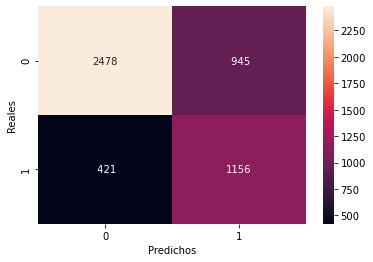

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Obtengo el valor de ROC y AUC 

In [33]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.7284818965886148


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

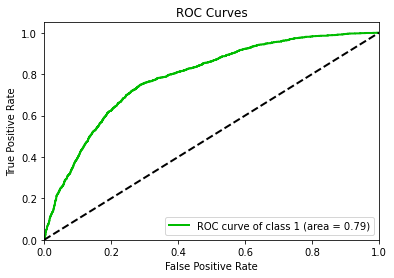

In [34]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos el modelo de Naive Bayes al dataset

In [35]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', GaussianNB())])

parameters = {'clasificador__priors': [None],
              'clasificador__var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
                    

In [36]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [37]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador', GaussianNB())]),
             n_jobs=5,
             param_grid={'clasificador__priors': [None],
                         'clasificador__var_smoothing': [1e-08, 1e-09, 1e-08]})

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [38]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.578
Best parameters set:
	 clasificador__priors: None
	 clasificador__var_smoothing: 1e-08


In [39]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [42]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.713265,0.933100,0.808505,3423
1,0.561303,0.185796,0.279181,1577
accuracy,0.697400,0.697400,0.697400,0
macro avg,0.637284,0.559448,0.543843,5000
weighted avg,0.665336,0.697400,0.641556,5000


Genero Matriz de confusion

Text(33.0, 0.5, 'Reales')

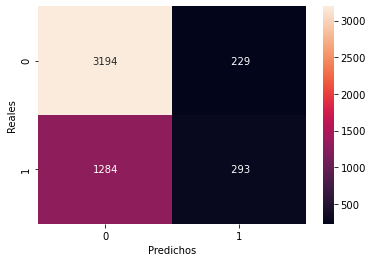

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Miro el valor de curva ROC y AUC

In [43]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.5594477175272425


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

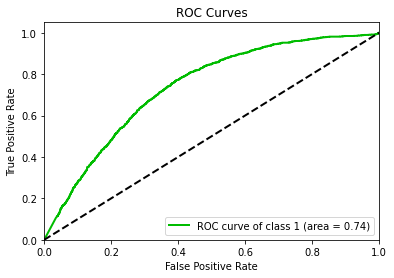

In [44]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos el clasificador KNN al dataset

In [45]:
pipeline = Pipeline([('union', union), 
                     ('clasificador', KNeighborsClassifier())])

parameters = {'clasificador__n_neighbors': range(1,50)}
                    

In [46]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [47]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             n_jobs=5, param_grid={'clasificador__n_neighbors': range(1, 50)})

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [48]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.647
Best parameters set:
	 clasificador__n_neighbors: 21


In [49]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [52]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.773363,0.807479,0.790053,3423
1,0.537868,0.486367,0.510823,1577
accuracy,0.706200,0.706200,0.706200,0
macro avg,0.655616,0.646923,0.650438,5000
weighted avg,0.699088,0.706200,0.701984,5000


Veo la Matriz de confusion

Text(33.0, 0.5, 'Reales')

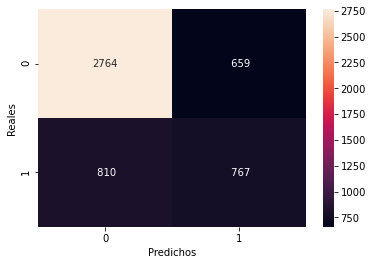

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Miro el valor de la curva ROC y AUC

In [53]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.6469226692275815


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

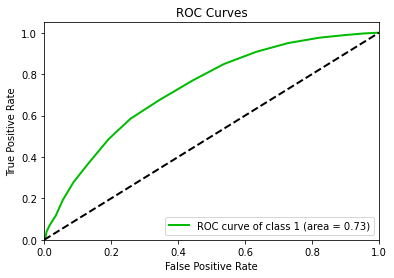

In [54]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos Arboles de Decision sobre el dataset

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

pipeline = Pipeline([('union', union), 
                     ('clasificador', DecisionTreeClassifier())])

parameters = {'clasificador__criterion': ['gini', 'entropy'],
          'clasificador__splitter': ['best', 'random'],
          'clasificador__max_depth': [None, 5, 10],
          'clasificador__min_samples_split': [2, 5],
          'clasificador__min_samples_leaf': [1, 2, 3]}
            
    


In [56]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [57]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        DecisionTreeClassifier())]),
             n_jobs=5,
             param_grid={'clasificador__criterion': ['gini', 'entropy'],
                         'clasificador__max_depth': [None, 5, 10],
                         'clasificador__min_samples_leaf': [1, 2, 3],
                         'clasificador__min_samples_split': [2, 5],
                         'clasificador__splitter': ['best', 'random']})

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [58]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.670
Best parameters set:
	 clasificador__criterion: 'entropy'
	 clasificador__max_depth: 5
	 clasificador__min_samples_leaf: 1
	 clasificador__min_samples_split: 2
	 clasificador__splitter: 'best'


In [59]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [62]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.840919,0.588373,0.692334,3423
1,0.459117,0.758402,0.571975,1577
accuracy,0.642000,0.642000,0.642000,0
macro avg,0.650018,0.673387,0.632155,5000
weighted avg,0.720498,0.642000,0.654373,5000


Genero Matriz de confusion

Text(33.0, 0.5, 'Reales')

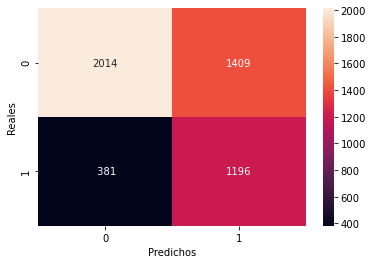

In [61]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

Miro valor de curva ROC y AUC

In [63]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.6733874007955805


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

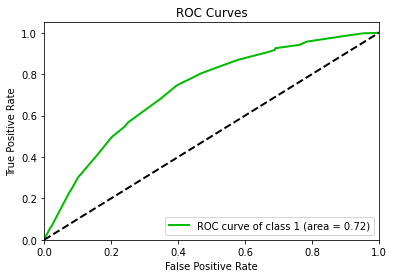

In [64]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos Random Forest al dataset

In [65]:
pipeline = Pipeline([('union', union), 
                     ('clasificador',RandomForestClassifier())])

parameters = {'clasificador__n_estimators':[3, 5, 10, 50],
          'clasificador__criterion': ['gini', 'entropy'],
          'clasificador__max_depth': [None, 3, 5],
          'clasificador__min_samples_split': [2,5],
          'clasificador__class_weight':[None, 'balanced']}


                    

In [66]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_search = GridSearchCV (pipeline, parameters,cv=folds, n_jobs = 5)

In [67]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('union',
                                        Pipeline(steps=[('standardscaler',
                                                         StandardScaler())])),
                                       ('clasificador',
                                        RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'clasificador__class_weight': [None, 'balanced'],
                         'clasificador__criterion': ['gini', 'entropy'],
                         'clasificador__max_depth': [None, 3, 5],
                         'clasificador__min_samples_split': [2, 5],
                         'clasificador__n_estimators': [3, 5, 10, 50]})

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [68]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.706
Best parameters set:
	 clasificador__class_weight: 'balanced'
	 clasificador__criterion: 'entropy'
	 clasificador__max_depth: None
	 clasificador__min_samples_split: 5
	 clasificador__n_estimators: 50


In [69]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [73]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.838453,0.677768,0.749596,3423
1,0.506046,0.716550,0.593176,1577
accuracy,0.690000,0.690000,0.690000,0
macro avg,0.672249,0.697159,0.671386,5000
weighted avg,0.733612,0.690000,0.700261,5000


Armo matriz de confusion

Text(33.0, 0.5, 'Reales')

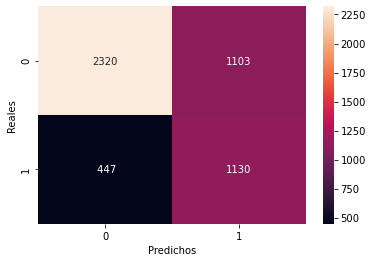

In [71]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [72]:
feature_names = grid_search.best_estimator_
feature_names

Pipeline(steps=[('union',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clasificador',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy',
                                        min_samples_split=5,
                                        n_estimators=50))])

Miro Curva ROC y AUC

In [74]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.6971592259531227


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

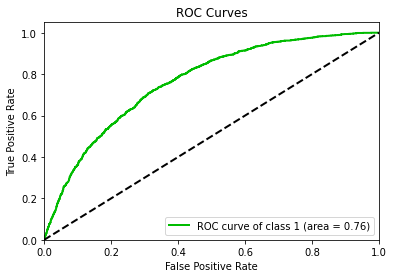

In [75]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos algoritmo Lightgbm al dataset

In [39]:
pipeline = Pipeline([('union', union), 
                     ('clasificador',lgb.LGBMClassifier())])

'''parameters = {'clasificador__n_estimators':[3, 5, 10, 50,100,500],
          'clasificador__max_depth': [None,1,2,3,4],
          'clasificador__learning_rate': [0.01, 0.1]}
'''

"parameters = {'clasificador__n_estimators':[3, 5, 10, 50,100,500],\n          'clasificador__max_depth': [None,1,2,3,4],\n          'clasificador__learning_rate': [0.01, 0.1]}\n"

In [40]:


parameters2={'clasificador__early_stopping_rounds': 20,
            'clasificador__eval_metric' : 'auc', 
            'clasificador__eval_set' : [(pd.DataFrame(X_test, columns=X.columns), y_test)],
            'clasificador__eval_names': ['valid'],
            'clasificador__verbose': 100,
            'clasificador__categorical_feature': 'auto'}

parameters ={
             'clasificador__max_depth': sp_randint(10,50),
             'clasificador__num_leaves': sp_randint(6, 50), 
             'clasificador__learning_rate ': [0.1,0.01,0.001],
             'clasificador__min_child_samples': sp_randint(100, 500), 
             'clasificador__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'clasificador__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'clasificador__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'clasificador__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'clasificador__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [41]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_search = RandomizedSearchCV (estimator=pipeline, param_distributions=parameters,cv=folds,refit=True, n_jobs = 5,verbose=False, n_iter=100, scoring='roc_auc')

In [42]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us, **parameters2)

[LightGBM] [Warning] learning_rate is set=0.1, learning_rate= will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Unknown parameter: 0.01
Training until validation scores don't improve for 20 rounds
[100]	valid's auc: 0.782716	valid's binary_logloss: 0.565848
Did not meet early stopping. Best iteration is:
[93]	valid's auc: 0.782758	valid's binary_logloss: 0.565818


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('union',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('clasificador',
                                              LGBMClassifier())]),
                   n_iter=100, n_jobs=5,
                   param_distributions={'clasificador__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017D8FA72E48>...
                                                                           1000.0,
                                                                           10000.0],
                                        'clasificador__num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017D91D0E408>,
                                        'clasificador__reg_alph

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [43]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.787
Best parameters set:
	 clasificador__colsample_bytree: 0.4755493512016191
	 clasificador__learning_rate : 0.01
	 clasificador__max_depth: 31
	 clasificador__min_child_samples: 141
	 clasificador__min_child_weight: 1
	 clasificador__num_leaves: 16
	 clasificador__reg_alpha: 1
	 clasificador__reg_lambda: 0.1
	 clasificador__subsample: 0.4895712951580568


In [44]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [48]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.852211,0.692375,0.764023,3423
1,0.525462,0.739379,0.614331,1577
accuracy,0.707200,0.707200,0.707200,0
macro avg,0.688837,0.715877,0.689177,5000
weighted avg,0.749155,0.707200,0.716810,5000


Armo matriz de confusion

Text(33.0, 0.5, 'Reales')

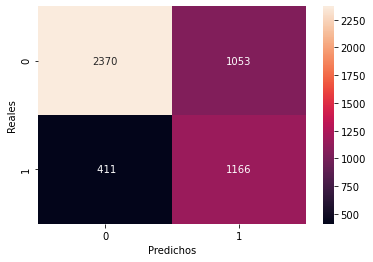

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [47]:
feature_names = grid_search.best_estimator_
feature_names

Pipeline(steps=[('union',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clasificador',
                 LGBMClassifier(colsample_bytree=0.4755493512016191,
                                learning_rate =0.01, max_depth=31,
                                min_child_samples=141, min_child_weight=1,
                                num_leaves=16, reg_alpha=1, reg_lambda=0.1,
                                subsample=0.4895712951580568))])

Veo valores de curva ROC y AUC

In [49]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.7158768382260997


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

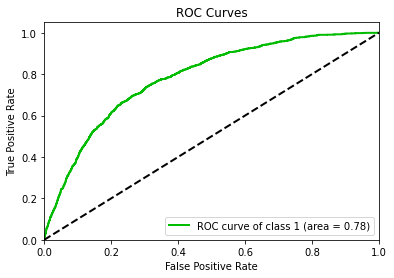

In [50]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Aplicamos algoritmo XGBoosting al dataset

In [26]:
pipeline = Pipeline([('union', union), 
                     ('clasificador',XGBClassifier())])

'''parameters = {'clasificador__n_estimators':[3, 5, 10, 50,100,500],
          'clasificador__max_depth': [None,1,2,3,4],
          'clasificador__learning_rate': [0.01, 0.1]}'''

"parameters = {'clasificador__n_estimators':[3, 5, 10, 50,100,500],\n          'clasificador__max_depth': [None,1,2,3,4],\n          'clasificador__learning_rate': [0.01, 0.1]}"

In [27]:
parameters2={'clasificador__verbose': 100}

parameters ={
             'clasificador__max_depth': sp_randint(10,50),
             'clasificador__num_leaves': sp_randint(6, 50), 
             'clasificador__learning_rate ': [0.1,0.01,0.001],
             'clasificador__min_child_samples': sp_randint(100, 500), 
             'clasificador__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'clasificador__subsample': sp_uniform(loc=0.2, scale=0.8), 
             'clasificador__colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'clasificador__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'clasificador__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [29]:
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)
grid_search = RandomizedSearchCV (estimator=pipeline, param_distributions=parameters,cv=folds,refit=True, n_jobs = 5,verbose=False, n_iter=100, scoring='roc_auc')

In [30]:
grid_search.fit(pd.DataFrame(X_train_us, columns=X.columns), y_train_us, **parameters2)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('union',
                                              Pipeline(steps=[('standardscaler',
                                                               StandardScaler())])),
                                             ('clasificador',
                                              XGBClassifier())]),
                   n_iter=100, n_jobs=5,
                   param_distributions={'clasificador__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017D9EE34888>,...
                                                                           1000.0,
                                                                           10000.0],
                                        'clasificador__num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017D9DCB3208>,
                                        'clasificador__reg_alph

Miro el mejor score con los hiperparametros dados, y sus metricas principales

In [31]:
print("Best score: %0.3f" % grid_search.best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

Best score: 0.787
Best parameters set:
	 clasificador__colsample_bytree: 0.4025676076477455
	 clasificador__learning_rate : 0.01
	 clasificador__max_depth: 22
	 clasificador__min_child_samples: 430
	 clasificador__min_child_weight: 0.01
	 clasificador__num_leaves: 22
	 clasificador__reg_alpha: 0
	 clasificador__reg_lambda: 100
	 clasificador__subsample: 0.7552782983491553


In [32]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [36]:
test = pd.DataFrame(classification_report(y_test, y_pred, digits=2,output_dict=True)).T
test['support'] = test.support.apply(int)
test.style.background_gradient(cmap='viridis',
                             subset=pd.IndexSlice['0':'9', :'f1-score'])

,precision,recall,f1-score,support
0,0.857091,0.688577,0.763648,3423
1,0.526222,0.750793,0.618761,1577
accuracy,0.708200,0.708200,0.708200,0
macro avg,0.691657,0.719685,0.691205,5000
weighted avg,0.752735,0.708200,0.717951,5000


Armo matriz de confusion

Text(33.0, 0.5, 'Reales')

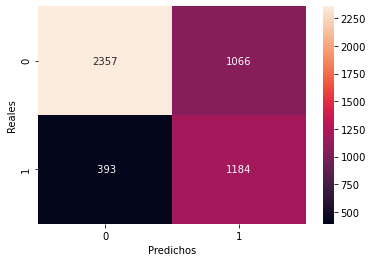

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [35]:
feature_names = grid_search.best_estimator_
feature_names

Pipeline(steps=[('union',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('clasificador',
                 XGBClassifier(colsample_bytree=0.4025676076477455,
                               learning_rate =0.01, max_depth=22,
                               min_child_samples=430, min_child_weight=0.01,
                               num_leaves=22, reg_lambda=100,
                               subsample=0.7552782983491553))])

Miro curva ROC y AUC

In [37]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,grid_search.best_estimator_.predict(X_test),multi_class="ovr")
print("El valor del AUC es: ", auc)

El valor del AUC es:  0.7196849578303065


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

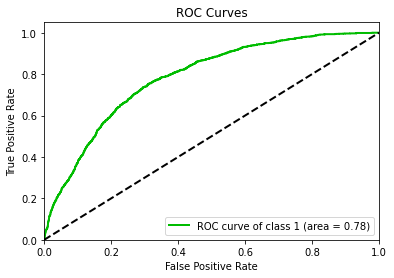

In [38]:
from scikitplot.metrics import plot_roc
plot_roc(y_test,grid_search.best_estimator_.predict_proba(X_test),plot_micro=False, plot_macro=False,classes_to_plot=1)

Analizo peso de variables en modelo ganador (TOP 50)

In [58]:
import eli5 as eli5

eli5.explain_weights(grid_search.best_estimator_.named_steps['clasificador'], top=50, feature_names=list(X.columns))

Weight,Feature
0.1675,sector_2
0.0404,ap40_04_4.0
0.0396,ap40_01_1.0
0.0300,edadA_junio2019_17.0
0.0297,ap24_1.0
0.0262,ap40_02_1.0
0.0244,ap17_6.0
0.0199,ap39_04_2.0
0.0172,isocioa_3.0
0.0166,ap40_01_4.0


Graficos descriptivos de features

Text(0.5, 0, 'Sexo')

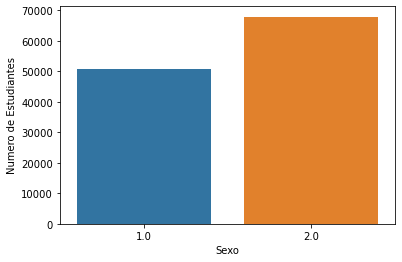

In [61]:
plt.figure()
sns.countplot(datafinal.ap02[(datafinal.values != -9).all(1)] ,label="Count")
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Sexo")

Text(0.5, 0, 'Sector de la Escuela')

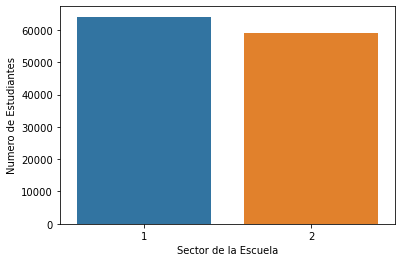

In [54]:
plt.figure()
sns.countplot(datafinal['sector'] ,label="Count")
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Sector de la Escuela")


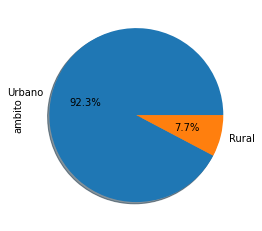

In [79]:
datafinal.ambito.value_counts().plot.pie(autopct='%1.1f%%',subplots=True,shadow=True,labels = ['Urbano','Rural'],);
plt.show()

Text(0.5, 0, 'Indice Socioeconomico')

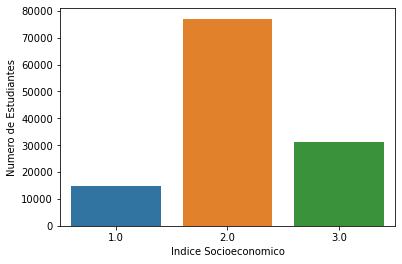

In [83]:
plt.figure()
sns.countplot(datafinal['isocioa'] )
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Indice Socioeconomico")


Text(0.5, 0, 'Desempeño por cuartil en Matematica')

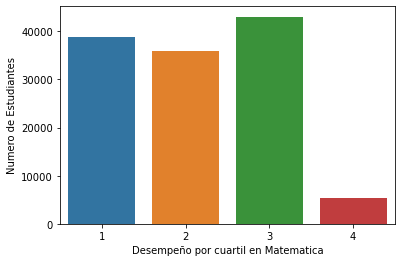

In [32]:
plt.figure()
sns.countplot(datafinal['mdesemp'] ,label="Count")
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Desempeño por cuartil en Matematica")



Text(0, 0.5, 'Porcentaje de estudiantes')

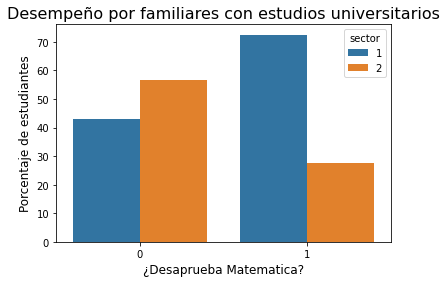

In [92]:
Variable = "sector"
Nombre_del_grafico = "Desempeño por familiares con estudios universitarios"

variable_counts = (datamate.groupby(['target'])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x="target", y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel("¿Desaprueba Matematica?",fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)

Text(0.5, 1.0, 'Distribucion de desaprobados en sector estatal privado')

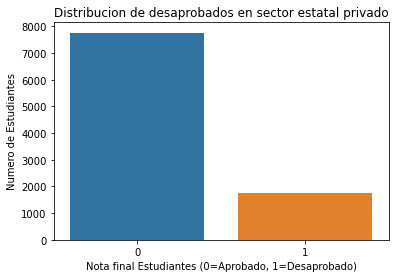

In [164]:
datagraf2= datamate.loc[(datamate['sector'] == 2) ]
plt.figure()

sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en sector estatal privado")


Text(0.5, 1.0, 'Distribucion de desaprobados en alumnos que respondieron Negativamente en la afirmacion: Disfruto estudiando Matemática')

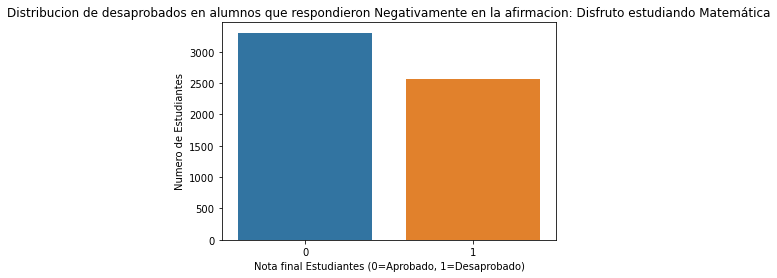

In [165]:
datagraf2= datamate.loc[(datamate['ap40_01'] == 1.0) ]
plt.figure()

sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en alumnos que respondieron Negativamente en la afirmacion: Disfruto estudiando Matemática")



Text(0.5, 1.0, 'Distribucion de desaprobados en estudiantes con indice socioeconomico Alto')

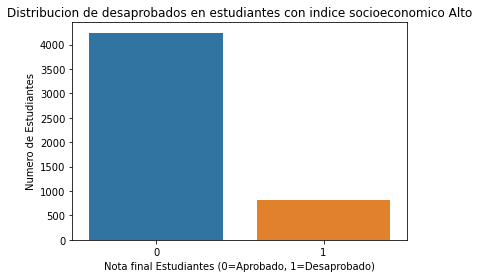

In [166]:
datagraf2= datamate.loc[(datamate['isocioa'] == 3.0) ]
plt.figure()

sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en estudiantes con indice socioeconomico Alto")



datagraf2= datamate.loc[(datamate['edadA_junio2019'] == 17.0) ]
plt.figure()

sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en estudiantes con edad: 17 años")

Text(0.5, 1.0, 'Distribucion de desaprobados en alumnos que respondieron  Positivamente\nen la afirmacion: Si me lo propongo, puedo ser bueno en Matemática\n')

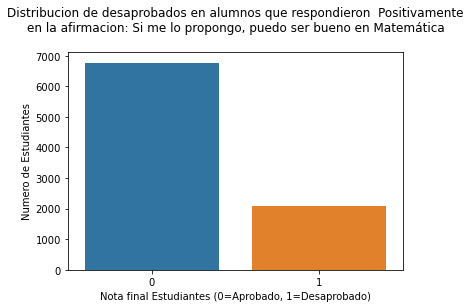

In [174]:
datagraf2= datamate.loc[(datamate['ap40_04'] == 4.0) ]
sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en alumnos que respondieron  Positivamente\nen la afirmacion: Si me lo propongo, puedo ser bueno en Matemática\n")


Text(0.5, 1.0, 'Distribucion de desaprobados en alumnos que respondieron Positivamente a la pregunta:\n ¿Vas a Seguir estudiando en educación universitaria cuando termines el secundario?\n')

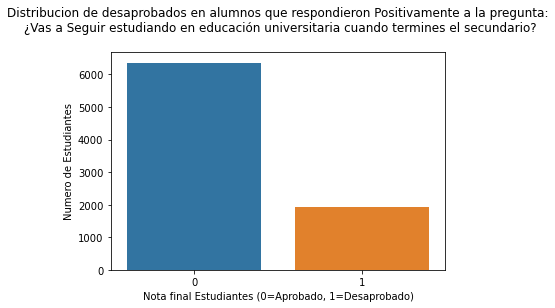

In [176]:
datagraf2= datamate.loc[(datamate['ap34'] == 2.0) ]
plt.figure()

sns.countplot(datagraf2['target'])
plt.ylabel("Numero de Estudiantes")
plt.xlabel("Nota final Estudiantes (0=Aprobado, 1=Desaprobado)")
plt.title("Distribucion de desaprobados en alumnos que respondieron Positivamente a la pregunta:\n ¿Vas a Seguir estudiando en educación universitaria cuando termines el secundario?\n")


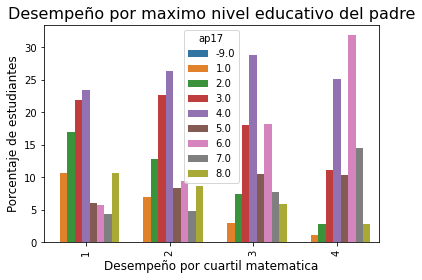

In [84]:
Variable = "ap17"
Nombre_del_grafico = "Desempeño por maximo nivel educativo del padre"

variable_counts = (datafinal.groupby(['mdesemp'])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
               S      .sort_values(Variable))
p = sns.barplot(x="mdesemp", y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel("Desempeño por cuartil matematica",fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

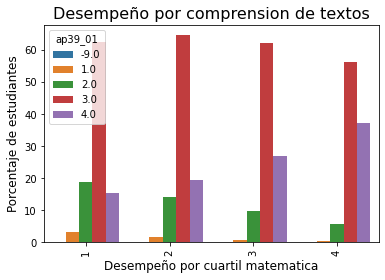

In [88]:

Target = "mdesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil matematica" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "ap39_01"
Nombre_del_grafico = "Desempeño por comprension de textos" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

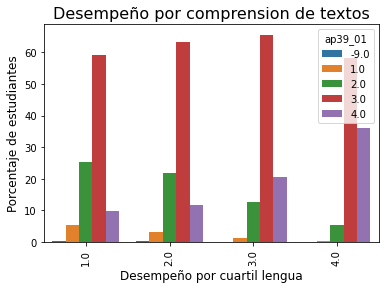

In [87]:

Target = "ldesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil lengua" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "ap39_01"
Nombre_del_grafico = "Desempeño por comprension de textos" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

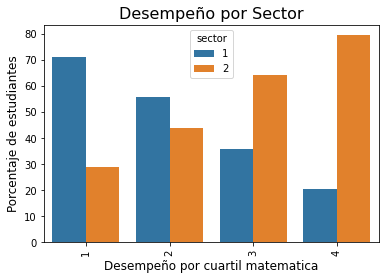

In [90]:
#Desempeño por Sector
#sector

Target = "mdesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil matematica" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "sector"
Nombre_del_grafico = "Desempeño por Sector" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

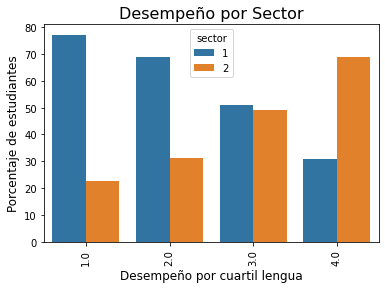

In [91]:
Target = "ldesemp" # "mdesemp" o "ldesemp"
Desempeño_leng_o_mat = "Desempeño por cuartil lengua" # "Desempeño por cuartil matematica" o "Desempeño por cuartil lengua"
Variable = "sector"
Nombre_del_grafico = "Desempeño por Sector" # El texto grande que aparece arriba del grafico

variable_counts = (datafinal.groupby([Target])[Variable]
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values(Variable))
p = sns.barplot(x=Target, y="percentage", hue=Variable, data=variable_counts)
p.axes.set_title(Nombre_del_grafico,fontsize=16)
p.set_xlabel(Desempeño_leng_o_mat,fontsize=12)
p.set_ylabel("Porcentaje de estudiantes",fontsize=12)
_ = plt.setp(p.get_xticklabels(), rotation=90)

Armo metrica KS para modelo ganador

In [59]:
prueba = pd.DataFrame(data=y_pred, columns=["y_pred"])
prueba.reset_index()
prueba2 = y_test
prueba2=prueba2.reset_index()
prueba2 = prueba2.drop(['index'],axis=1)
prueba2 = prueba2.rename(columns = {'mdesemp': 'y_test'}, inplace = False)
result = prueba.merge(prueba2,left_index=True,right_index=True)
result

,y_pred,y_test
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
4995,1,1
4996,1,0
4997,0,0
4998,0,0


In [60]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from scipy import stats
import matplotlib.pyplot as plt
# %matplotlib inline

def plot_roc_curve(y, y_pred, gini, ks):
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)

    fig = plt.figure()
    plt.plot(fpr, tpr, 'b--', label='%s AUC = %0.4f, GINI = %0.2f, KS = %s' % ('Model: ', roc_auc, gini, ks))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0, fontsize='small')
    plt.show()
    
gini = 2 * roc_auc_score(result['y_test'], result['y_pred']) - 1
ks = stats.ks_2samp(result[result['y_test'] == 0]['y_pred'], result[result['y_test'] == 1]['y_pred']).statistic
print('GINI = %s, KS = %s' % (gini, ks))

GINI = 0.4317536764521994, KS = 0.4317536764521993


Armo dataset para propuesta de implementación

In [61]:
prueba3 = X_test
prueba3 = prueba3.reset_index()
prueba3 = prueba3.drop(['index'],axis=1)

In [62]:
df_salida = prueba3.merge(result,left_index=True,right_index=True)

In [64]:
y_predProba = grid_search.best_estimator_.predict_proba(X_test)

In [65]:
prueba = pd.DataFrame(data=y_predProba, columns=["score_0", "score_1"])

In [66]:
df_salida = prueba.merge(prueba2,left_index=True,right_index=True)

In [68]:
df_salida['Rank'] = pd.qcut(df_salida['score_1'], 10,
                               labels = False)

In [70]:
df_salida.groupby('Rank')['y_test'].agg(['sum','count'])

,sum,count
Rank,,
0,15,500
1,45,500
2,65,500
3,94,500
4,123,500
5,138,500
6,202,500
7,248,500
8,304,500
